In [16]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

In [38]:
def getData02(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('e_jet')
    scalar.append('eta_jet')
    scalar.append('p_jet')
    scalar.append('pt_jet')
    scalar.append('phi_jet')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [24]:
def getData17(inputFiles):
    cols = []
    scalar = []
    scalar.append('nnh')
    scalar.append('ncharged')
    scalar.append('n_decay_photon')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('y')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [51]:
def getData23(inputFiles):
    cols = []
    scalar = []
    scalar.append('phi_jet')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [1]:
def getDataQ(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('eta_quark')
    scalar.append('p_quark')
    scalar.append('theta_quark')
    
    scalar.append('eta_electron')
    scalar.append('p_electron')
    scalar.append('pt_electron')
    scalar.append('theta_electron')  
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [10]:
def getDataJ(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid') 
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    
    scalar.append('eta_jet')
    scalar.append('p_jet')
    scalar.append('theta_jet')
    scalar.append('phi_jet')
    
    scalar.append('eta_electron')
    scalar.append('p_electron')
    scalar.append('pt_electron')
    scalar.append('theta_electron')  
    scalar.append('phi_photon')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [14]:
def getDataPart(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('pt_electron')
    scalar.append('phi_photon')
    
    cols.append('p_part')
    cols.append('eta_part')
    cols.append('theta_part')
    cols.append('phi_part')
    
    scalar.append('p_electron')
    scalar.append('eta_electron')
    scalar.append('theta_electron')
    
    lists = scalar + cols
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
file1 = ["$HOME/EIC/output/102.root"]
a = getData02(file1)

In [25]:
file2 = ['$HOME/EIC/output/117.root']
aa = getData17(file2)


Processed $HOME/EIC/output/117.root in 27.5 seconds


In [63]:
file3 = ["$HOME/EIC/output/1123.root"]
aaa = getData02(file3)


Processed $HOME/EIC/output/1123.root in 64.4 seconds


In [10]:
file4 = ["$HOME/EIC/output/123.root"]
aaaa = getData02(file4)


Processed $HOME/EIC/output/123.root in 24.4 seconds


In [6]:
aq = getDataQ(file1)

Processed $HOME/EIC/output/102.root in 39.4674320221 seconds


In [11]:
aj = getDataJ(file1)

Processed $HOME/EIC/output/102.root in 46.9117879868 seconds


In [15]:
file5 = ["$HOME/EIC/output/101.root"]
ap = getDataPart(file5)


Processed $HOME/EIC/output/101.root in 1538.2 seconds


# Figure 2

In [8]:
b = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
b = applyCut(b, 'Q2 > 25', 'Q2 > 25')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

0.1 < y < 0.85 6783540  fraction kept: 18.7
Q2 > 25 785883  fraction kept: 11.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 220056  fraction kept: 28.0

Remove extra jets 146644  fraction kept: 66.6


In [9]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

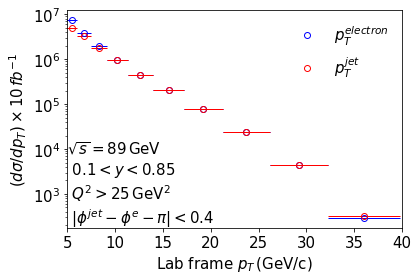

In [11]:
plt.errorbar(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/(2*ntrials*xerr), 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/(2*ntrials*xerr), 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('Lab frame $p_T \, (\mathrm{GeV/c})$', fontsize=15)
plt.ylabel(r'$(d\sigma/dp_T) \times 10 \, fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(5,2e2,'$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 \, \mathrm{GeV^2}$ \n $|\phi^{jet} - \phi^e - \pi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_dist.pdf', bbox_inches='tight')

# Figure 3

In [21]:
c = applyCut(a, '0.1 < y < 0.85', 'y')
c = applyCut(c, 'W2 > 4', 'W2')
c = applyCut(c, 'pt_electron > 4', 'pt_electron')

y 6783540  fraction kept: 18.7
W2 6783540  fraction kept: 100.0
pt_electron 802917  fraction kept: 11.8


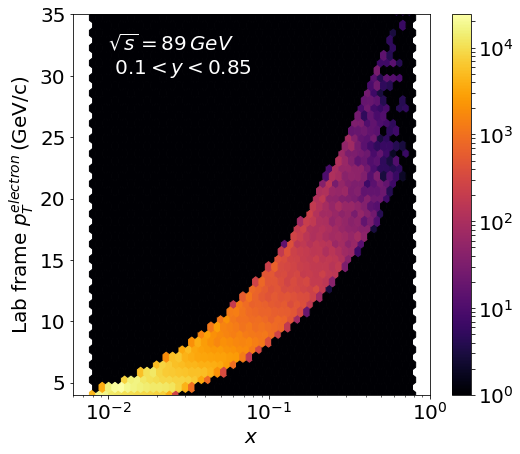

In [22]:
fig = plt.figure(figsize=(8,7))
hist = plot2d(c, 'x', 'pt_electron', '$x$', 'Lab frame $ p_T^{electron} \, (\mathrm{GeV/c}) $')
hist.colorbar.ax.tick_params(labelsize=20)
plt.xlim(left=6e-3,right=1)
plt.ylim(bottom=4, top=35)
plt.text(0.01,30,'$\sqrt{s}=89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$', fontsize=20, color='white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('images/pt_electron_vs_x.pdf', bbox_inches='tight')

# Figure 4

In [23]:
d = applyCut(a, '0.1 < y < 0.85', 'y')
d = applyCut(d, 'Q2 > 10', 'Q2')
d = applyCut(d, 'pt_jet > 4', 'pt')

y 6783540  fraction kept: 18.7
Q2 2277556  fraction kept: 33.6
pt 188342  fraction kept: 8.3


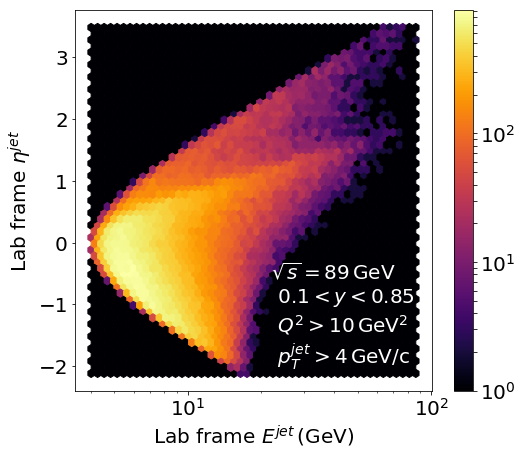

In [24]:
fig = plt.figure(figsize=(8,7))
hist = plot2d(d, 'e_jet', 'eta_jet', 'Lab frame $ E^{jet} \, (\mathrm{GeV})$', 'Lab frame $ \eta^{jet} $')
hist.colorbar.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(22,-2,'$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $Q^2 > 10 \, \mathrm{GeV^2}$ \n $p_T^{jet} > 4 \
    \, \mathrm{GeV/c}$', fontsize=20, color='white')
plt.savefig('images/eta_jet_vs_e_jet.pdf', bbox_inches='tight')

# Figure 5

In [26]:
e = applyCut(aa, '0.1 < y < 0.85', '0.1 < y < 0.85')
e = applyCut(e, 'W2 > 4', 'W2 > 4')
e = applyCut(e, 'Q2 > 1', 'Q2 > 1')
e.eval('tot = nnh + ncharged + n_decay_photon', inplace=True)

0.1 < y < 0.85 6783540  fraction kept: 18.7
W2 > 4 6783540  fraction kept: 100.0
Q2 > 1 6783540  fraction kept: 100.0


In [28]:
etaedges = [-4.5, 4.5]
ptedges = toArrayFloat(0, 1.55, 0, log=True, logNum=13)
ee = partitionEtaPt(e, etaedges, ptedges)


-4.5 < eta_jet < 4.5 

-4.5 < eta_jet < 4.5 6783540  fraction kept: 100.0
1.0 < pt_jet < 1.3463769461724673 585922  fraction kept: 8.6
1.3463769461724673 < pt_jet < 1.812730881184699 413156  fraction kept: 6.1
1.812730881184699 < pt_jet < 2.440619068041981 320441  fraction kept: 4.7
2.440619068041981 < pt_jet < 3.285993247600655 251405  fraction kept: 3.7
3.285993247600655 < pt_jet < 4.424185553847917 172699  fraction kept: 2.5
4.424185553847917 < pt_jet < 5.956621435290106 104289  fraction kept: 1.5
5.956621435290106 < pt_jet < 8.019857777551351 57693  fraction kept: 0.9
8.019857777551351 < pt_jet < 10.7977516232771 28637  fraction kept: 0.4
10.7977516232771 < pt_jet < 14.537843856076622 12820  fraction kept: 0.2
14.537843856076622 < pt_jet < 19.573417814876606 4907  fraction kept: 0.1
19.573417814876606 < pt_jet < 26.353198503751333 1293  fraction kept: 0.0
26.353198503751333 < pt_jet < 35.48133892335755 147  fraction kept: 0.0


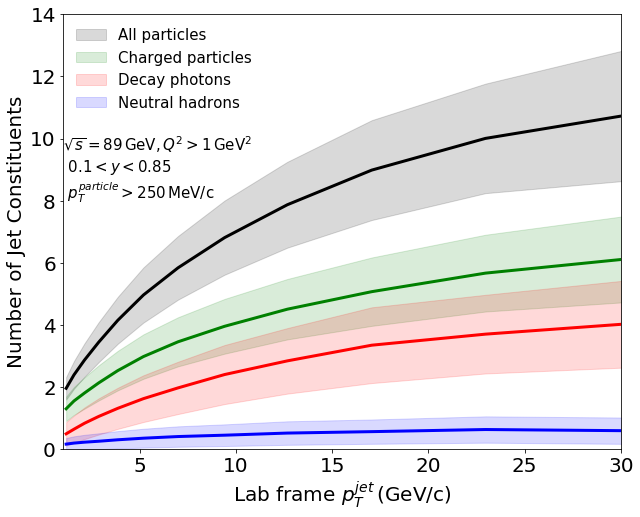

In [32]:
var_array = ['tot','ncharged','n_decay_photon','nnh']
color_array = ['black','g','r','b']
label_array = ['All particles','Charged particles','Decay photons','Neutral hadrons']

fig = plt.figure(figsize=(10,8))
x = []*(len(ptedges)-1)
xerr = getInterval(ptedges)/2
for i in range(0,len(var_array)):
    y = []*(len(ptedges)-1)
    yerr = []*(len(ptedges)-1)
    for j in range(len(ptedges)-1):
        var = ee[0][j][var_array[i]]
        if i == 0:
            x.append((((float)(ptedges[j])) + ptedges[j+1])/2)
        y.append(np.mean(var))
        yerr.append(np.std(var)/2)
    plt.plot(x, y, color=color_array[i], linewidth=3)
    plt.fill_between(x, np.array(y)+np.array(yerr), np.array(y)-np.array(yerr), color=color_array[i],\
                     alpha=0.15, label=label_array[i])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Lab frame $p_T^{jet} \, (\mathrm{GeV/c})$', fontsize=20)
plt.ylabel('Number of Jet Constituents', fontsize=20)
plt.xlim(left=1, right=30)
plt.ylim(bottom=0, top=14)
plt.legend(prop={'size': 15}, frameon=False, loc='upper left')
plt.text(1,8,'$ \sqrt{s} = 89 \, \mathrm{GeV}, Q^2 > 1 \, \mathrm{GeV^2}$ \n $0.1 < y < 0.85$ \n $p_T^{particle} > 250 \
    \, \mathrm{MeV/c} $', fontsize=15)
plt.savefig('images/number_vs_pt_new.pdf', bbox_inches='tight')

# Figure 6

In [39]:
radii = [0, 10, 20, 30, 40]
r_labels = ['$0$','$10$','$20$','$30$','$40$']
radii_s = [0, 5, 10, 15, 20]
r_labels_s = ['$0$','$5$','$10$','$15$','$20$']
angles = [90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180, 182.09858297, 185.700470875, 195.414626807,
          220.395062579, 270, 319.604937421, 344.585373193, 354.299529125, 357.90141703, 360]
eta_labels=['$0$','$-1$','$-2$','$-3$','$-4$','$-\infty$','$-4$','$-3$','$-2$','$-1$','$0$','$1$','$2$','$3$','$4$','$\infty$']
nr = 40
nr_s = 20
ntheta = 90

In [8]:
q = applyCut(aq, '10 < pt_electron < 30', '10 < pt_electron < 30')
q = applyCut(q, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
q = applyCut(q, 'Q2 > 100', 'Q2 > 100')
q.eval('theta_quark_neg = 6.28318530718 - theta_quark', inplace = True)
q = keepOneJet(q)

10 < pt_electron < 30 81249  fraction kept: 0.2
0.1 < y < 0.85 62733  fraction kept: 77.2
Q2 > 100 62733  fraction kept: 100.0

Remove extra jets 15610  fraction kept: 24.9


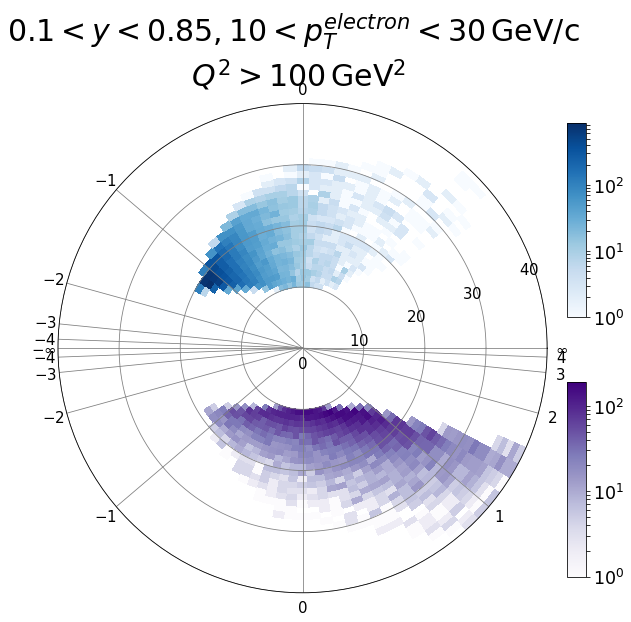

In [77]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(q['p_electron'], q['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(q['p_quark'], q['theta_quark_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Purples', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 10 < p_T^{electron} < 30 \, \mathrm{GeV/c}$ \n $Q^2 > 100 \, \mathrm{GeV^2}$',fontsize=30,y=1.03)
plt.savefig('images/polar_quark_1_large_font.pdf', bbox_inches='tight')

In [12]:
jj = applyCut(aj, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
jj = applyCut(jj, '10 < pt_electron < 30', '10 < pt_electron < 30')
jj = applyCut(jj, 'Q2 > 100', 'Q2 > 100')
jj_e = keepOneJet(jj)
jj.eval('theta_jet_neg = 6.28318530718 - theta_jet', inplace = True)
jj = fixPhi(jj, 'photon')
jj = applyCut(jj, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
jj = applyCut(jj, 'p_jet > 5', 'p_jet > 5')

0.1 < y < 0.85 6783540  fraction kept: 18.7
10 < pt_electron < 30 62733  fraction kept: 0.9
Q2 > 100 62733  fraction kept: 100.0

Remove extra jets 15610  fraction kept: 24.9
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 21515  fraction kept: 34.3
p_jet > 5 17266  fraction kept: 80.3


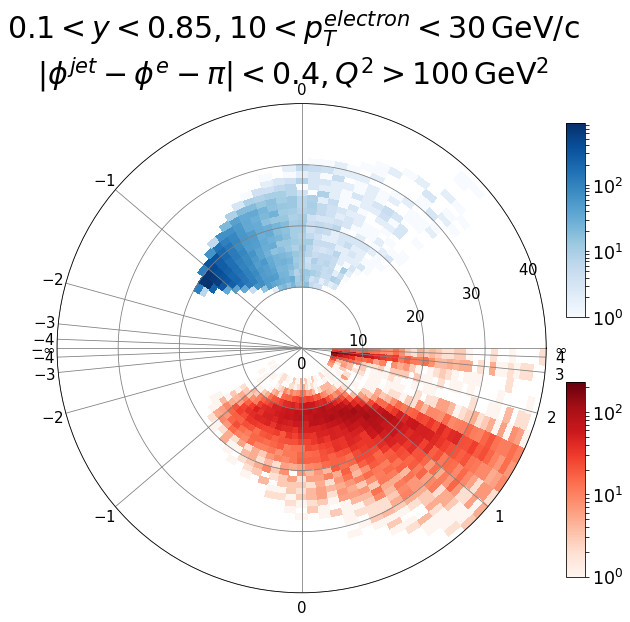

In [90]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(jj_e['p_electron'], jj_e['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(jj['p_jet'], jj['theta_jet_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Reds', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 10 < p_T^{electron} < 30 \, \mathrm{GeV/c}$\n\
$|\phi^{jet} - \phi^e - \pi|<0.4, Q^2 > 100 \, \mathrm{GeV^2}$', fontsize=30, y=1.03)
plt.savefig('images/polar_jet_1_large_font.pdf', bbox_inches='tight')

In [17]:
h = applyCut(ap, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
h = applyCut(h, '10 < pt_electron < 30', '10 < pt_electron < 30')
h = applyCut(h, 'Q2 > 100', 'Q2 > 100')
h_e = keepOneJet(h)
h.eval('theta_part_neg = 6.28318530718 - theta_part', inplace = True)
h = fixPhiPart(h, 'photon')
h = applyCut(h, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

0.1 < y < 0.85 11700542  fraction kept: 17.5
10 < pt_electron < 30 196850  fraction kept: 1.7
Q2 > 100 196850  fraction kept: 100.0

Remove extra jets 15610  fraction kept: 7.9
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 110629  fraction kept: 56.2


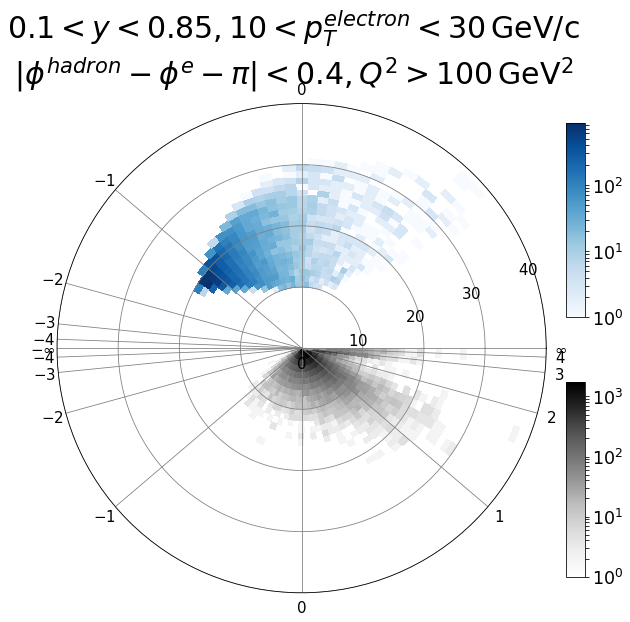

In [89]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr, nr + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(h_e['p_electron'], h_e['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(h['p_part'], h['theta_part_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Greys', norm=LogNorm())
plt.rgrids(radii, labels=r_labels, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 10 < p_T^{electron} < 30 \, \mathrm{GeV/c}$\n\
$|\phi^{hadron} - \phi^e - \pi|<0.4, Q^2 > 100 \, \mathrm{GeV^2}$', fontsize=30, y=1.03)
plt.savefig('images/polar_particle_1_large_font.pdf', bbox_inches='tight')

In [21]:
qq = applyCut(aq, '0.008 < x < 0.01', '0.008 < x < 0.01')
qq = applyCut(qq, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
qq = applyCut(qq, '25 < Q2 < 55', '25 < Q2 < 55')
qq.eval('theta_quark_neg = 6.28318530718 - theta_quark', inplace = True)
qq = keepOneJet(qq)

0.008 < x < 0.01 1876312  fraction kept: 5.2
0.1 < y < 0.85 330560  fraction kept: 17.6
25 < Q2 < 55 55689  fraction kept: 16.8

Remove extra jets 9383  fraction kept: 16.8


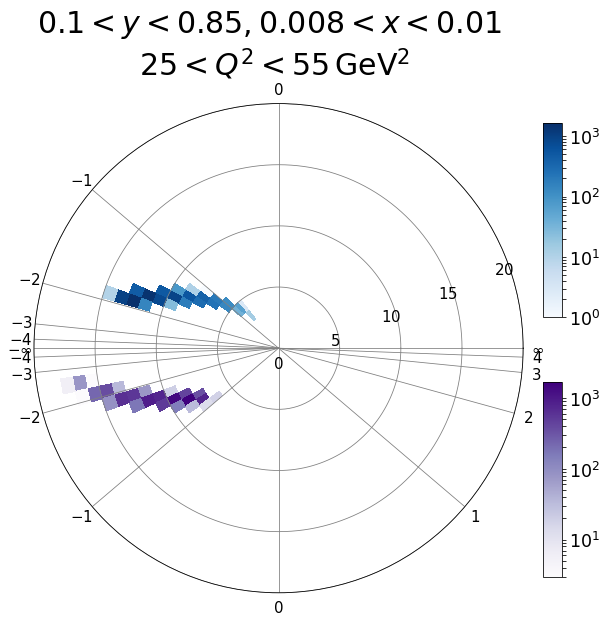

In [82]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr_s, nr_s + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(qq['p_electron'], qq['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(qq['p_quark'], qq['theta_quark_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Purples', norm=LogNorm())
plt.rgrids(radii_s, labels=r_labels_s, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 0.008 < x < 0.01$ \n $25 < Q^2 < 55 \, \mathrm{GeV^2}$', fontsize=30, y=1.03)
plt.savefig('images/polar_quark_2_large_font.pdf', bbox_inches='tight')

In [23]:
jjj = applyCut(aj, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
jjj = applyCut(jjj, '0.008 < x < 0.01', '0.008 < x < 0.01')
jjj = applyCut(jjj, '25 < Q2 < 55', '25 < Q2 < 55')
jjj_e = keepOneJet(jjj)
jjj.eval('theta_jet_neg = 6.28318530718 - theta_jet', inplace = True)
jjj = fixPhi(jjj, 'photon')
jjj = applyCut(jjj, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
jjj = applyCut(jjj, 'p_jet > 5', 'p_jet > 5')

0.1 < y < 0.85 6783540  fraction kept: 18.7
0.008 < x < 0.01 330560  fraction kept: 4.9
25 < Q2 < 55 55689  fraction kept: 16.8

Remove extra jets 9383  fraction kept: 16.8
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 14184  fraction kept: 25.5
p_jet > 5 7742  fraction kept: 54.6


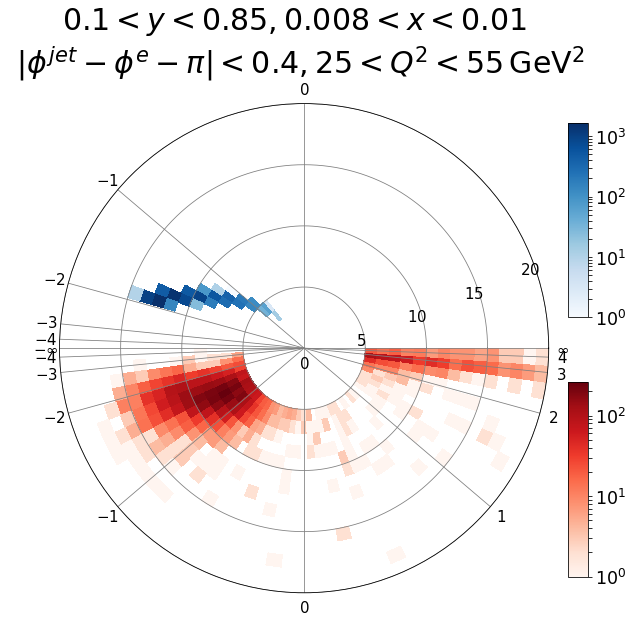

In [83]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr_s, nr_s + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(jjj_e['p_electron'], jjj_e['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(jjj['p_jet'], jjj['theta_jet_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Reds', norm=LogNorm())
plt.rgrids(radii_s, labels=r_labels_s, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 0.008 < x < 0.01$ \n $|\phi^{jet} - \phi^e - \pi|<0.4, 25 < Q^2 < 55 \, \mathrm{GeV^2}$', \
             fontsize=30, y=1.03)
plt.savefig('images/polar_jet_2_large_font.pdf', bbox_inches='tight')

In [25]:
hh = applyCut(ap, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
hh = applyCut(hh, '0.008 < x < 0.01', '0.008 < x < 0.01')
hh = applyCut(hh, '25 < Q2 < 55', '25 < Q2 < 55')
hh_e = keepOneJet(hh)
hh.eval('theta_part_neg = 6.28318530718 - theta_part', inplace = True)
hh = fixPhiPart(hh, 'photon')
hh = applyCut(hh, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

0.1 < y < 0.85 11700542  fraction kept: 17.5
0.008 < x < 0.01 615385  fraction kept: 5.3
25 < Q2 < 55 106221  fraction kept: 17.3

Remove extra jets 9383  fraction kept: 8.8
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 34674  fraction kept: 32.6


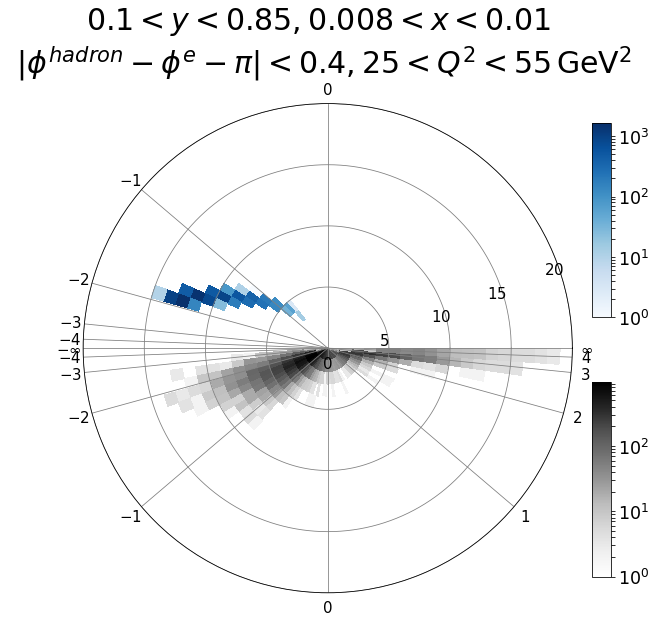

In [87]:
fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(111, polar=True)
r_edges = np.linspace(0, nr_s, nr_s + 1)
theta_edges = np.linspace(0, 2*np.pi, ntheta + 1)
H_e = plt.hist2d(hh_e['p_electron'], hh_e['theta_electron'], [r_edges, theta_edges])[0]
H_q = plt.hist2d(hh['p_part'], hh['theta_part_neg'], [r_edges, theta_edges])[0]
plt.cla()
    
Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = plt.pcolormesh(Theta, R, H_e, cmap='Blues', norm=LogNorm())
im_q = plt.pcolormesh(Theta, R, H_q, cmap='Greys', norm=LogNorm())
plt.rgrids(radii_s, labels=r_labels_s, fontsize=15)
plt.thetagrids(angles, labels=eta_labels, fontsize=15)
plt.grid(color='grey')
cbar_e = plt.colorbar(im_e, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.55, 0.03, 0.3]))
cbar_e.ax.tick_params(labelsize=17.5)
cbar_q = plt.colorbar(im_q, shrink=0.7, pad=0.01, cax=plt.axes([0.92, 0.15, 0.03, 0.3]))
cbar_q.ax.tick_params(labelsize=17.5)
plt.suptitle('$0.1 < y < 0.85, 0.008 < x < 0.01$ \n $|\phi^{hadron} - \phi^e - \pi|<0.4, 25 < Q^2 < 55 \, \mathrm{GeV^2}$', \
             fontsize=30, y=1.03)
plt.savefig('images/polar_particle_2_large_font.pdf', bbox_inches='tight')

# Figure 7

In [33]:
f = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
f = applyCut(f, 'pt_jet > 4', 'pt_jet > 4')
f = applyCut(f, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
f = applyCut(f, '10 < pt_electron < 15', '10 < pt_electron < 15')
f = fixPhi(f, 'photon')
f.eval('pt_ratio = pt_jet/pt_electron', inplace = True)
f1 = applyCut(f, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.1 < y < 0.85 134309  fraction kept: 44.1
10 < pt_electron < 15 12740  fraction kept: 9.5
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 11515  fraction kept: 90.4


In [34]:
color_array = ['r', 'g']
label_array = ['$p_T^{jet} > 4 \, \mathrm{GeV/c}$','$p_T^{jet} > 4 \, \mathrm{GeV/c}$ \n $|\phi^{jet} - \phi^e - \pi|< 0.4$']
xvar_array = toArrayFloat(0, 2, 0.05)
df_array = [f, f1]
var_array = ['pt_ratio']*2
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]

In [35]:
f1.eval('nu = 0.533*Q2/x', inplace=True)
print np.mean(f1['x']), np.mean(f1['nu'])

0.113782346 1174.2916


In [36]:
f.eval('nu = 0.533*Q2/x', inplace=True)
print np.mean(f['x']), np.mean(f['nu'])

0.11354612 1171.1764


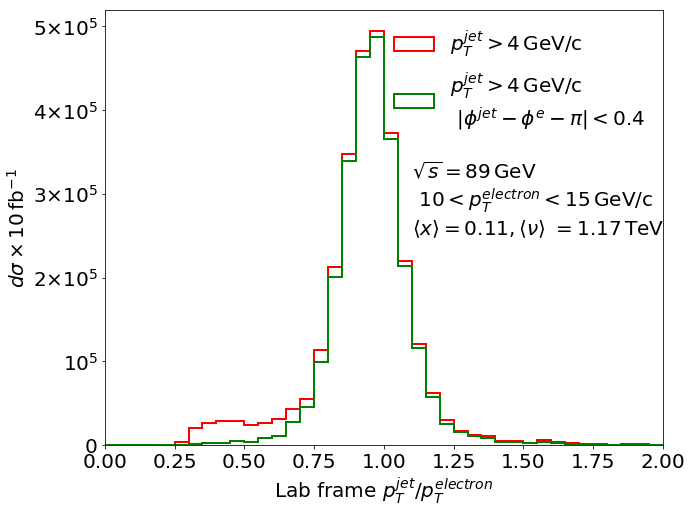

In [37]:
fig = plt.figure(figsize = (10,8))
for i in range(0, len(df_array)):
    plt.hist(df_array[i][var_array[i]], weights=[10*xsec*1e12/ntrials]*len(df_array[i][var_array[i]]), range=(0,2), bins=40, histtype = 'step',\
             color=color_array[i], label = label_array[i], linewidth = 2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.xlabel('Lab frame $p_T^{jet}/p_T^{electron}$', fontsize=20)
plt.ylabel(r'$d\sigma \times 10 \, \mathrm{fb^{-1}}$', fontsize=20)
plt.xlim(left=0, right=2)
plt.legend(prop={'size': 20}, frameon=False, loc='upper right')
plt.text(1.1,250000,'$\sqrt{s}=89 \, \mathrm{GeV}$ \n $10 < p_T^{electron} < 15 \, \mathrm{GeV/c}$ \n' + \
         r'$\langle x \rangle = 0.11, \langle \nu \rangle\ = 1.17 \, \mathrm{TeV}$', fontsize = 20)
plt.savefig('images/pt_ratio.pdf', bbox_inches='tight')

In [40]:
ff = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
ff = applyCut(ff, 'p_jet > 5', 'p_jet > 5')
ff = applyCut(ff, 'eta_jet < 0', 'eta_jet < 0')
ff = applyCut(ff, '25 < Q2 < 55', '25 < Q2 < 55')
ff = applyCut(ff, '0.008 < x < 0.01', '0.008 < x < 0.01')
ff.eval('pt_ratio = pt_jet/pt_electron', inplace = True)

0.1 < y < 0.85 6783540  fraction kept: 18.7
p_jet > 5 1235189  fraction kept: 18.2
eta_jet < 0 329560  fraction kept: 26.7
25 < Q2 < 55 54698  fraction kept: 16.6
0.008 < x < 0.01 8169  fraction kept: 14.9


In [41]:
ff = fixPhi(ff, 'photon')
ff.eval('pt_ratio = pt_jet/pt_electron', inplace = True)
ff1 = applyCut(ff, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 6678  fraction kept: 81.7


In [42]:
color_array = ['r', 'g']
label_array = ['No $|\phi^{jet} - \phi^e - \pi|$ cut','$|\phi^{jet} - \phi^e - \pi|< 0.4$']
xvar_array = toArrayFloat(0, 2, 0.05)
df_array = [ff, ff1]
var_array = ['pt_ratio']*2
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]

In [43]:
ff1.eval('nu = 0.533*Q2/x', inplace=True)
print np.mean(ff1['x']), np.mean(ff1['nu'])

0.0089764865 2146.5522


In [44]:
ff.eval('nu = 0.533*Q2/x', inplace=True)
print np.mean(ff['x']), np.mean(ff['nu'])

0.008966765 2151.0322


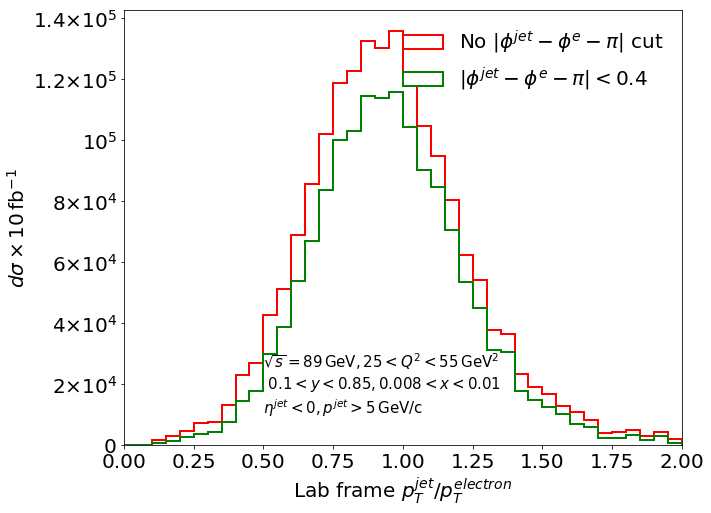

In [50]:
fig = plt.figure(figsize = (10,8))
for i in range(0, len(df_array)):
    plt.hist(df_array[i][var_array[i]], weights=[10*xsec*1e12/ntrials]*len(df_array[i][var_array[i]]), range=(0,2), bins=40, histtype = 'step',\
             color=color_array[i], label = label_array[i], linewidth = 2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ff = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.xlabel('Lab frame $p_T^{jet}/p_T^{electron}$', fontsize=20)
plt.ylabel(r'$d\sigma \times 10 \, \mathrm{fb^{-1}}$', fontsize=20)
plt.xlim(left=0, right=2)
plt.legend(prop={'size': 20}, frameon=False, loc='upper right')
plt.text(0.5,10000,'$\sqrt{s}=89 \, \mathrm{GeV}, 25 < Q^2 < 55 \, \mathrm{GeV^2} $ \n $0.1 < y < 0.85, 0.008 < x < 0.01$ \n' + \
         '$\eta^{jet} < 0, p^{jet} > 5 \, \mathrm{GeV/c}$', fontsize = 15)
plt.savefig('images/pt_ratio_low_x.pdf', bbox_inches='tight')

# Figure 8

In [53]:
dphi = np.array([0.00099, 0.01259, 0.02259, 0.03259, 0.04259, 0.06259, 0.08259, 0.10259, 0.12259, 0.14259, 0.16259, 0.18259, 
                 0.20259, 0.22259, 0.24259, 0.26259, 0.28259, 0.30259, 0.32259, 0.34259, 0.39259, 0.44259, 0.49259, 0.54259, 
                 0.59259, 0.64259, 0.69259, 0.74259, 0.84259, 0.94259, 1.04259])
ql0 = np.array([10.512, 10.409, 10.161, 9.7880, 9.3170, 8.2121, 7.0871, 6.0918, 5.2653, 4.5801, 3.9988, 3.5009, 3.0773, 2.7164,
                2.4032, 2.1263, 1.8822, 1.6712, 1.4909, 1.3345, 1.0125, 0.7831, 0.6128, 0.4821, 0.3872, 0.3145, 0.2573, 0.2123, 
                0.1475, 0.1047, 0.0752])
ql2 = np.array([9.8631, 9.7903, 9.6136, 9.3439, 8.9948, 8.1334, 7.1796, 6.2539, 5.4240, 4.7096, 4.1034, 3.5889, 3.1502, 2.7740, 
                2.4489, 2.1663, 1.9200, 1.7056, 1.5190, 1.3562, 1.0305, 0.7948, 0.6214, 0.4915, 0.3938, 0.3188, 0.2602, 0.2141,
                0.1477, 0.1040, 0.0738])
ql8 = np.array([8.6893, 8.6506, 8.5557, 8.4079, 8.2108, 7.6938, 7.0601, 6.3686, 5.6708, 5.0053, 4.3958, 3.8530, 3.3778, 2.9658,
                2.6098, 2.3023, 2.0362, 1.8054, 1.6046, 1.4296, 1.0820, 0.8309, 0.6470, 0.5104, 0.4075, 0.3288, 0.2676, 0.2197,  
                0.1510, 0.1058, 0.0745])

In [68]:
g = applyCut(aaa, 'pt_electron > 9 and pt_electron < 11', '9 < pt_electron < 11 GeV')
g = fixPhi(g, 'photon')

9 < pt_electron < 11 GeV 308126  fraction kept: 0.7
Fixed photon phi range
Fixed photon delta phi range


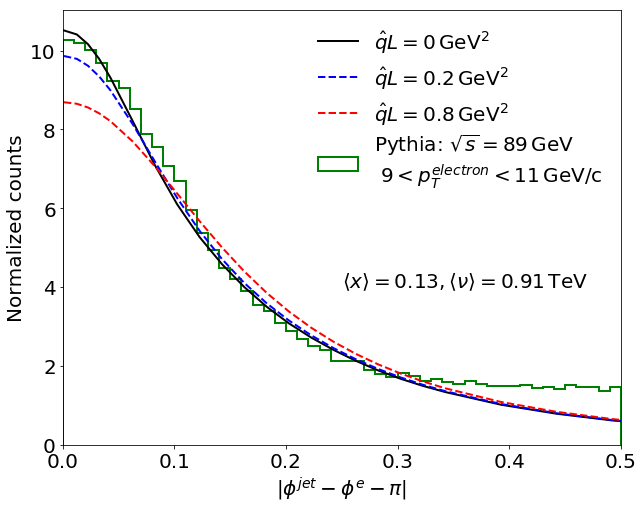

In [71]:
fig = plt.figure(figsize = (10,8))
hist = plt.hist(g['delta_phi_photon_abs'], range=(0,0.5), bins=50)
plt.cla()
weights = [np.trapz(ql0,dphi)/integrate(0.01, hist[0], 0, 0.5)] * len(g['delta_phi_photon_abs'])
plt.hist(g['delta_phi_photon_abs'], range=(0,0.5), bins=50, histtype='step', color='green', linewidth=2,\
         label='Pythia: $\sqrt{s}=89 \, \mathrm{GeV}$ \n $9 < p_T^{electron} < 11 \, \mathrm{GeV/c}$', weights=weights)
plt.plot(dphi, ql0, color='black', label='$\hat{q}L=0 \, \mathrm{GeV^2}$', linewidth=2)
plt.plot(dphi, ql2, 'b--', label='$\hat{q}L=0.2 \, \mathrm{GeV^2}$', linewidth=2)
plt.plot(dphi, ql8, 'r--', label='$\hat{q}L=0.8 \, \mathrm{GeV^2}$', linewidth=2)
plt.xlim(left=0, right=0.5)
plt.xlabel('$|\phi^{jet} - \phi^e - \pi|$', fontsize=20)
plt.ylabel('Normalized counts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.25,4,r'$\langle x \rangle = 0.13, \langle \nu \rangle = 0.91 \, \mathrm{TeV}$', fontsize = 20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.savefig('images/dphi_dist.pdf', bbox_inches='tight')

In [64]:
gg = applyCut(aaa, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
gg = applyCut(gg, 'p_jet > 5', 'p_jet > 5')
gg = applyCut(gg, 'eta_jet < 0', 'eta_jet < 0')
gg = applyCut(gg, '25 < Q2 < 55', '25 < Q2 < 55')
gg = applyCut(gg, '0.008 < x < 0.01', '0.008 < x < 0.01')
gg = fixPhi(gg, 'photon')

0.1 < y < 0.85 20813797  fraction kept: 48.6
p_jet > 5 4308441  fraction kept: 20.7
eta_jet < 0 1360600  fraction kept: 31.6
25 < Q2 < 55 270765  fraction kept: 19.9
0.008 < x < 0.01 40929  fraction kept: 15.1
Fixed photon phi range
Fixed photon delta phi range


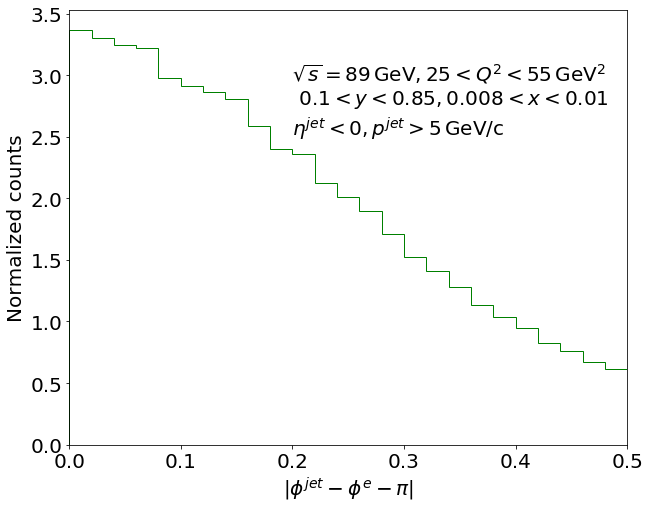

In [67]:
fig = plt.figure(figsize = (10,8))
plt.hist(gg['delta_phi_photon_abs'], range=(0,0.5), bins=25, histtype='step', color='green', normed=True)
plt.xlim(left=0, right=0.5)
plt.xlabel('$|\phi^{jet} - \phi^e - \pi|$', fontsize=20)
plt.ylabel('Normalized counts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.2,2.5,'$\sqrt{s}=89 \, \mathrm{GeV}, 25 < Q^2 < 55 \, \mathrm{GeV^2} $ \n $0.1 < y < 0.85, 0.008 < x < 0.01$ \n' + \
         '$\eta^{jet} < 0, p^{jet} > 5 \, \mathrm{GeV/c}$', fontsize = 20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.savefig('images/dphi_dist_lox_x.pdf', bbox_inches='tight')

# Figure 9

In [1]:
print "See number_of_jet_constituents_for_jets_and_groomed_jets.ipynb"

See number_of_jet_constituents_for_jets_and_groomed_jets.ipynb
The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


# Figure 10

In [2]:
print "See dpt.ipynb"

See dpt.ipynb
